<a href="https://colab.research.google.com/github/Lourdes-Tolotto/ML/blob/main/Ej_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **El ritmo de la música**
Este *dataset* está compuesto por canciones de 2017 con atributos de la API de Spotify. Cada canción ha sido etiquetada por alguien que usó "1", cuando le gusta la canción o "0" si no le gusta. 

Su tarea es construir un clasificador que pueda predecir las preferencias de los atributos de la canción.

Cada fila del *dataframe* representa una canción. Hay 16 columnas, 13 de las cuales son atributos de la canción, una columna para el nombre de la canción, una para el artista y una columna llamada "destino", que es la etiqueta mencionada anteriormente para la canción. Los atributos de la pista son: acústica, bailabilidad, duración, energía, instrumentalidad, clave, vivacidad, volumen, modo, habla, tempo, marca de tiempo, valencia (más información[aquí](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stt

#leemos el dataset
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
#print(df.columns[0])

In [ ]:
from scipy.stats import normaltest

# Se analiza un conjunto de datos para determinar si tienen distribucion normal

def print_hist(data, data_name, ax):
    
    # Con este criterio se asume que los datos tienen una distribucion normal
    # si p_value>0.5
    stat, p_value = normaltest(data)
    
    if p_value > 0.05: 
      normal = True
      sns.histplot(data, kde=True, ax=ax, color='green')
      ax.set_title(data_name + ' (Posee D. Normal)')
    else: 
      normal = False
      sns.histplot(data, kde=True, ax=ax, color='red')
      ax.set_title(data_name + ' (NO Posee D. Normal)')
    
    return normal


In [ ]:
# Imprime cada feature del dataset informando si tiene distribucion normal o no

def DF_analysis(df, fig_fils, fig_cols):
    
    features = df.columns
    fig, axes = plt.subplots(fig_fils, fig_cols, figsize=(15,15))
    plt.subplots_adjust(hspace=0.5, wspace=0.7)
    axes = axes.ravel()

    count = 0

    for feature, ax in zip(features, axes):
        if print_hist(df[feature], feature, ax)==True : count = count + 1

    print("Features con distribución normal: ",count)

    fig.suptitle('Analisis de cada feature')
    plt.show()

acousticness :  1.6571591453636743
danceability :  -0.4192974651038977
duration_ms :  2.4971530133488997
energy :  -0.9123313384341504
instrumentalness :  1.9513026552668689
key :  -0.009352997138735858
liveness :  1.9512510070482514
loudness :  -2.2248998989347797
mode :  -0.4609579894467956
speechiness :  2.3078628024767656
tempo :  0.4387317875934339
time_signature :  -2.232858837612626
valence :  0.07833137552694745

14
10

['acousticness' 'danceability' 'duration_ms' 'energy' 'instrumentalness'
 'key' 'liveness' 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature'
 'valence' 'target']

['acousticness' 'danceability' 'energy' 'instrumentalness' 'key'
 'liveness' 'mode' 'tempo' 'valence' 'target']

Features con distribución normal:  0


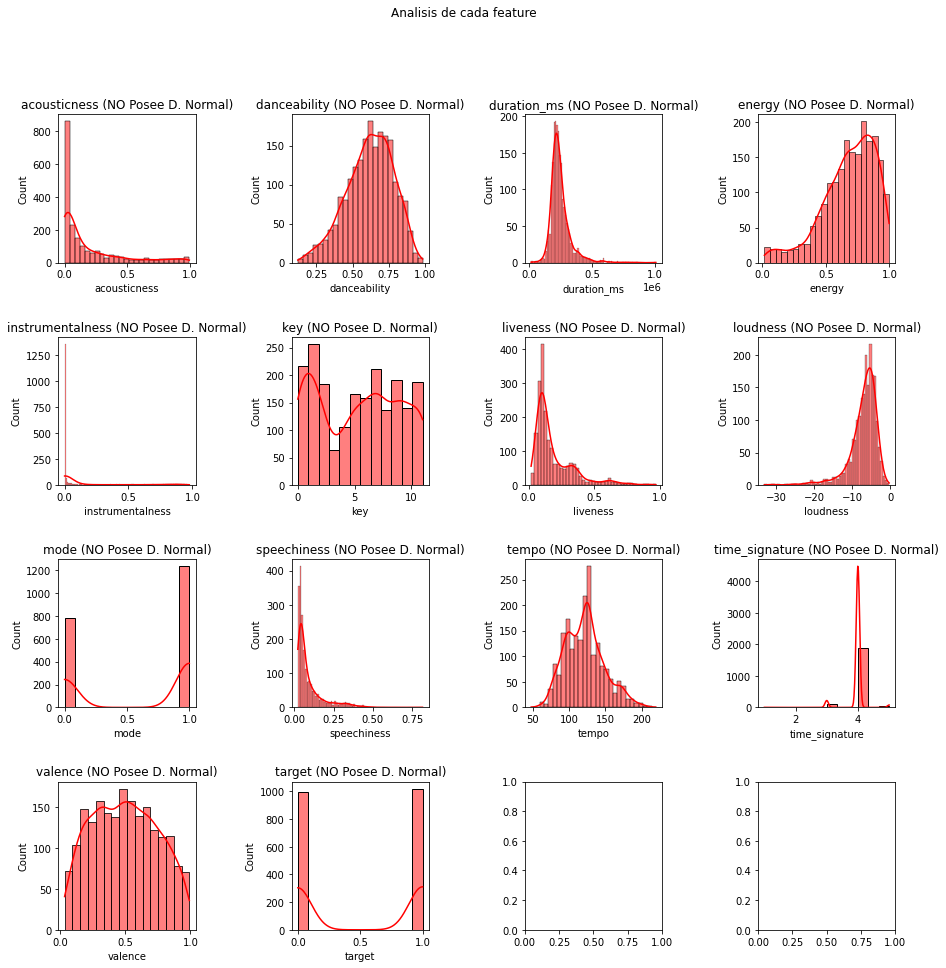

Features con distribución normal:  0


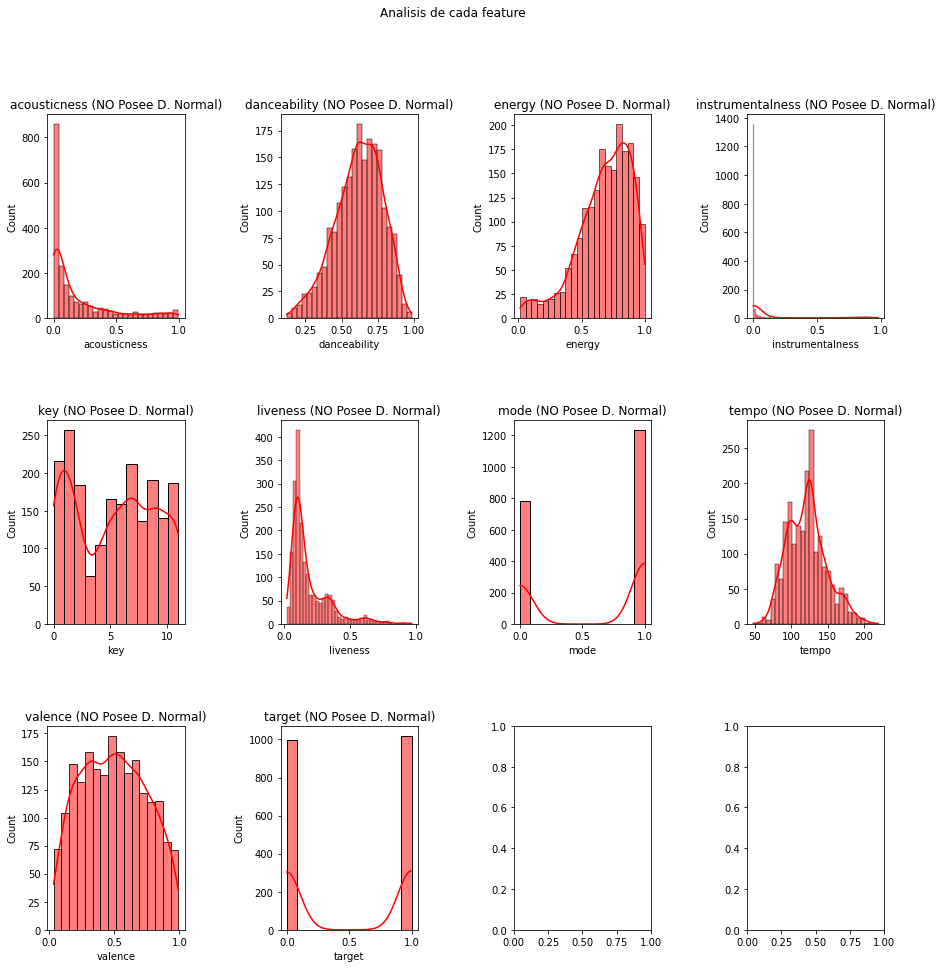

In [ ]:
#print(len(attributes_spotify.columns))

from scipy.stats import skew
from scipy.stats import percentileofscore

names = df.columns.values
df_cut = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
df_cut2 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")

# Se quitan los features que no aportan informacion al momento de realizar el analisis
# y que ademas, poseen variables cuyo tipo no permiten un analisis

df_cut.drop([names[0], names[15], names[16]], axis = 1, inplace = True)
df_cut2.drop([names[0], names[15], names[16]], axis = 1, inplace = True)

# Se eliminan los features que no son relevantes para el analisis

for i in range (1, len(df_cut.columns)):
  print(names[i],': ',skew(df_cut[names[i]]))
  if abs(skew(df_cut[names[i]])) > 2: 
   df_cut.drop(names[i], axis = 1, inplace = True)

names_cutted = df_cut.columns.values
names_aux3 = np.delete(names, [0,15,16])

print()
print(len(names_aux3))
print(len(names_cutted))
print()
print(names_aux3)
print()
print(names_cutted)
print()

DF_analysis(df_cut2,4,4)
DF_analysis(df_cut,3,4)

['acousticness' 'danceability' 'duration_ms' 'energy' 'instrumentalness'
 'key' 'liveness' 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature'
 'valence']
['acousticness' 'danceability' 'energy' 'instrumentalness' 'key'
 'liveness' 'mode' 'tempo' 'valence']



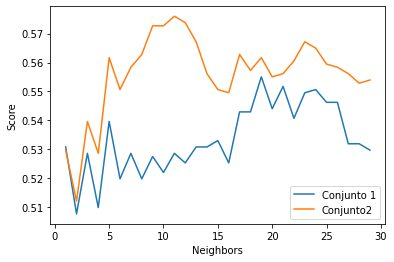

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

# Se quita el target ya que es el feature que se quiere analizar
# Se utilizan dos conjuntos de datos: uno donde se han quitado los features
# que no aportan informacion y otro donde se han quitado aquellos cuyas variables
# no aportan informacion y, ademas no pueden analizarse por su tipo  para observar 

names_aux = np.delete(names_cutted,len(names_cutted)-1)
names_aux2 = np.delete(names, [0,14,15,16])
print(names_aux2)
print()
print(names_aux)
print()

X_tr, X_ts, Y_tr, Y_ts = train_test_split(df_cut[names_aux],df['target'], 
                          test_size= 0.45, random_state = 20)

X_tr2, X_ts2, Y_tr2, Y_ts2 = train_test_split(df[names_aux2], df['target'], 
                              test_size= 0.45, random_state = 20)

n = np.arange(1,30)
score = np.zeros(np.size(n))
score2 = np.zeros(np.size(n))

# Se analizan los dos conjuntos de datos tomando distintos valores de k

for k in n:

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_tr, Y_tr)
  Y_pred = knn.predict(X_ts)
  score[k-1] = knn.score(X_ts, Y_ts)

  knn2 = KNeighborsClassifier(n_neighbors=k)
  knn2.fit(X_tr2, Y_tr2)
  Y_pr2 = knn2.predict(X_ts2)
  score2[k-1] = knn2.score(X_ts2, Y_ts2)


plt.plot(n,score)
plt.plot(n,score2)
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.legend(['Conjunto 1','Conjunto2'])

plt.show()


